In [2]:
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download dataset
path = kagglehub.dataset_download("mohit55/elden-ring-weapon-data-all-affinities")
print("Path to dataset files:", path)

# Step 2: Check what files were downloaded
print("Files in the directory:", os.listdir(path))

# Step 3: Load the correct file from the downloaded path
# Replace with the exact file name shown from the list above
file_name = 'EldenRingMaxWeapons.csv'  # Update this if needed
df = pd.read_csv(os.path.join(path, file_name))

# Step 4: Inspect the data
print(df.head())

c:\Users\MegaN\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\MegaN\.cache\kagglehub\datasets\mohit55\elden-ring-weapon-data-all-affinities\versions\1
Files in the directory: ['combineAll.ipynb', 'EldenRingMaxWeapons.csv', 'weapons']
                       weapon_name  physical_dmg  magic_dmg  fire_dmg  \
0          Rogier's Rapier (heavy)           209          0         0   
1                   Rapier (heavy)           216          0         0   
2            Noble's Estoc (heavy)           232          0         0   
3                    Estoc (heavy)           239          0         0   
4  Cleanrot Knight's Sword (heavy)           244          0         0   

   lightning_dmg  holy_dmg  crit_multiplier poise_dmg strength_scaling  \
0              0         0              110        62                A   
1              0         0              130        60                B   
2              0         0              100        60                B   
3              0         0              100        66        

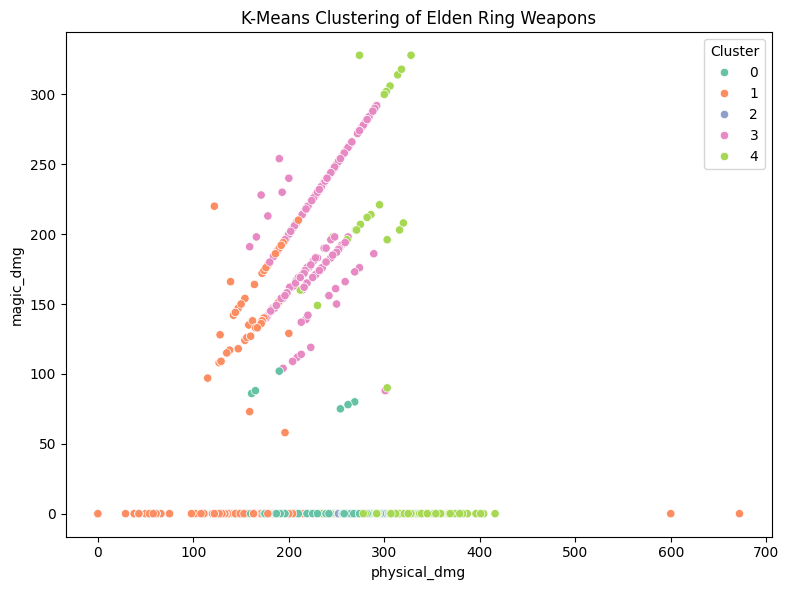

In [9]:
# Step 4: Filter numeric columns only
df_numeric = df.select_dtypes(include=['number'])

# Drop missing values
df_clean = df_numeric.dropna()

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Step 6: Apply KMeans clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Plot clusters (use two numeric features that exist in df_clean)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_clean.iloc[:, 0],
    y=df_clean.iloc[:, 1],
    hue=df_clean['cluster'],
    palette='Set2'
)
plt.title("K-Means Clustering of Elden Ring Weapons")
plt.xlabel(df_clean.columns[0])
plt.ylabel(df_clean.columns[1])
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

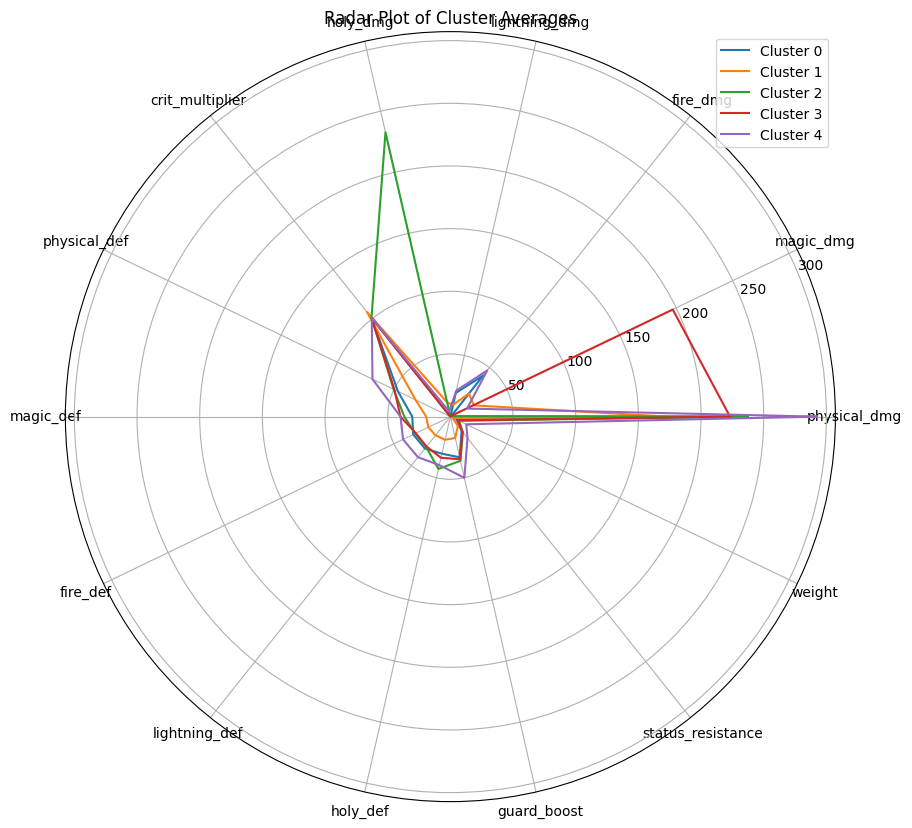

In [6]:
# Compute cluster means
cluster_means = df_clean.groupby('cluster').mean()

# Radar plot setup
import numpy as np

features = cluster_means.columns
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the circle
angles += angles[:1]

# Plot
plt.figure(figsize=(12, 10))
for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # complete loop
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], features, rotation=45)
plt.title("Radar Plot of Cluster Averages")
plt.legend(loc='upper right')
plt.show()
